# Quantum-inspired annealing

In this notebook, the quantum-inspired annealing for portfolio optimization is emplemented. First of all we calculated the exact solutions for 10-asset and 20-asset sets by brute force. Then, we implemented algorithm, described in https://doi.org/10.1364/OE.27.010288. Finally, we performed a possible QEM-inspired method for postprocessing. However, we didn't achieve any improvements, suggesting that QEM methods are not easily replicable in classical algorithms. This technique, targeting namely quantum-source errors, does not perform well, when trying to be realised on simulated errors. For now, this approach to find QEM-inspired algorithms seem to be less promising, then classical postprocessing techniques.



In [309]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

# Coefficients from real data

Here, the coeficients for 10-set (first) and 20-set (second) are defined. They are reversed, since simCIM algorithm maximizes the QUBO form.

In [310]:
h_1 =  -1*np.array([0.002604436005845128, 0.0001475925102276803, 0.00027610744514037285, 0.0009531352190088845, 0.0008832730418414711, 0.0005514854135555177, 0.00036824724562903213, 0.0007795499217198617, 0.0010928987465737147, 0.0005110770116494802])
J_1 = -1*np.array([[0.00032046046738773236, 2.9170726800890566e-05, 4.794455109070797e-05, 1.743194222284266e-05, 4.396621124520363e-05, 5.580537021872531e-05, 4.819681199885957e-05, 2.360712380745998e-05, 4.9583783787242055e-05, 2.4848893910628197e-05],
[2.9170726800890566e-05, 5.518250394454241e-05, 3.8806268993469535e-05, 1.7251409891672705e-05, 2.6771444211360497e-05, 2.3527246116971536e-05, 1.8676009091018325e-05, 1.8035176537351594e-05, 3.0913523658249386e-05, 1.632152003270879e-05],
[4.794455109070797e-05, 3.8806268993469535e-05, 8.180208036570616e-05, 1.828037765705621e-05, 2.4329766900505015e-05, 3.109377385312019e-05, 2.7568321236511164e-05, 1.9348697120987928e-05, 3.5751538282575865e-05, 2.004294471810628e-05],
[1.743194222284266e-05, 1.7251409891672705e-05, 1.828037765705621e-05, 4.793731174059693e-05, 1.2446104022834137e-05, 1.9071729679101816e-05, 1.7672868206903787e-05, 3.509184475515416e-05, 2.0135676427363255e-05, 3.307663785139458e-05],
[4.396621124520363e-05, 2.6771444211360497e-05, 2.4329766900505015e-05, 1.2446104022834137e-05, 9.123253763409188e-05, 2.6427424441009536e-05, 1.7149641051083732e-05, 1.0915167979545485e-05, 2.5661130513084227e-05, 1.2722563077307526e-05],
[5.580537021872531e-05, 2.3527246116971536e-05, 3.109377385312019e-05, 1.9071729679101816e-05, 2.6427424441009536e-05, 5.385214180747792e-05, 3.4948035197358135e-05, 2.0968991233564606e-05, 3.772708295933949e-05, 2.0513966060119692e-05],
[4.819681199885957e-05, 1.8676009091018325e-05, 2.7568321236511164e-05, 1.7672868206903787e-05, 1.7149641051083732e-05, 3.4948035197358135e-05, 5.5854269912009204e-05, 1.802057800501208e-05, 3.632726388287251e-05, 1.8630759753540577e-05],
[2.360712380745998e-05, 1.8035176537351594e-05, 1.9348697120987928e-05, 3.509184475515416e-05, 1.0915167979545485e-05, 2.0968991233564606e-05, 1.802057800501208e-05, 4.3121136886459995e-05, 2.1803859656732146e-05, 3.3751971619564626e-05],
[4.9583783787242055e-05, 3.0913523658249386e-05, 3.5751538282575865e-05, 2.0135676427363255e-05, 2.5661130513084227e-05, 3.772708295933949e-05, 3.632726388287251e-05, 2.1803859656732146e-05, 8.224767523212344e-05, 2.3415689187458213e-05],
[2.4848893910628197e-05, 1.632152003270879e-05, 2.004294471810628e-05, 3.307663785139458e-05, 1.2722563077307526e-05, 2.0513966060119692e-05, 1.8630759753540577e-05, 3.3751971619564626e-05, 2.3415689187458213e-05, 4.497062771499336e-05]])

In [311]:
h = -1*np.array([0.0036346112659595906, 0.0006316909776104469, 0.0008699437510284579, 0.0013392671856833458, 0.0013879278037356867, 0.0012141871119801435, 0.0008889385674761964, 0.0011553376000349692, 0.0017615481545932732, 0.0008911406360305534, 0.0011716979538296292, 0.0015405733396617767, 0.001543641915993737, 0.001570573032459637, 0.0013369236039704004, 0.0011422850749643653, 0.0013750420141347955, 0.001131124498172374, 0.00047791437377213734, 0.0006013557401137384])
J = -1*np.array([[0.00032046046738773236, 2.9170726800890566e-05, 4.794455109070797e-05, 1.743194222284266e-05, 4.396621124520363e-05, 5.580537021872531e-05, 4.819681199885957e-05, 2.360712380745998e-05, 4.9583783787242055e-05, 2.4848893910628197e-05, 7.345478931018381e-05, 6.633853914320603e-05, 6.379775776751954e-05, 3.952437545893724e-05, 2.5089458214801202e-05, 1.987548443832619e-05, 9.731850745795969e-05, 8.930827918950908e-05, 2.1024675975173295e-05, 1.9355763101615392e-05] ,
[2.9170726800890566e-05, 5.518250394454241e-05, 3.8806268993469535e-05, 1.7251409891672705e-05, 2.6771444211360497e-05, 2.3527246116971536e-05, 1.8676009091018325e-05, 1.8035176537351594e-05, 3.0913523658249386e-05, 1.632152003270879e-05, 3.1091439424639706e-05, 3.1150120795236754e-05, 2.988018971005781e-05, 2.015296699510775e-05, 2.577007084393903e-05, 2.3777189066321216e-05, 2.032287676287384e-05, 1.5044150875300057e-05, 2.2905644175931017e-05, 2.1954585041976012e-05] ,
[4.794455109070797e-05, 3.8806268993469535e-05, 8.180208036570616e-05, 1.828037765705621e-05, 2.4329766900505015e-05, 3.109377385312019e-05, 2.7568321236511164e-05, 1.9348697120987928e-05, 3.5751538282575865e-05, 2.004294471810628e-05, 3.5764339140821835e-05, 3.798089229757071e-05, 3.578748651172024e-05, 2.3853188705032445e-05, 2.413350055675645e-05, 1.968666806256758e-05, 3.968759750085073e-05, 2.960797224591244e-05, 2.9155427670294592e-05, 2.12610802525155e-05] ,
[1.743194222284266e-05, 1.7251409891672705e-05, 1.828037765705621e-05, 4.793731174059693e-05, 1.2446104022834137e-05, 1.9071729679101816e-05, 1.7672868206903787e-05, 3.509184475515416e-05, 2.0135676427363255e-05, 3.307663785139458e-05, 1.763014758214991e-05, 1.766896647383162e-05, 1.5037006216104409e-05, 1.8780430896224456e-05, 2.5675822831371673e-05, 2.713761460026098e-05, 2.0900549948512954e-05, 8.914439480535371e-06, 2.0131306263887553e-05, 2.1189699044351667e-05] ,
[4.396621124520363e-05, 2.6771444211360497e-05, 2.4329766900505015e-05, 1.2446104022834137e-05, 9.123253763409188e-05, 2.6427424441009536e-05, 1.7149641051083732e-05, 1.0915167979545485e-05, 2.5661130513084227e-05, 1.2722563077307526e-05, 3.5262696376295647e-05, 3.378929926343896e-05, 3.3483653471722e-05, 2.2689185124447987e-05, 2.059878250127724e-05, 1.4716701158252626e-05, 3.32448195273435e-05, 3.0448505129734895e-05, 1.4137818622734462e-05, 1.3955919771860521e-05] ,
[5.580537021872531e-05, 2.3527246116971536e-05, 3.109377385312019e-05, 1.9071729679101816e-05, 2.6427424441009536e-05, 5.385214180747792e-05, 3.4948035197358135e-05, 2.0968991233564606e-05, 3.772708295933949e-05, 2.0513966060119692e-05, 4.273834918464724e-05, 4.118623327481829e-05, 4.152804424818527e-05, 3.0539845751112265e-05, 1.9787661351475254e-05, 2.0786350616246625e-05, 5.084240449009886e-05, 4.7812928458617804e-05, 1.927630769483128e-05, 1.685272414228003e-05] ,
[4.819681199885957e-05, 1.8676009091018325e-05, 2.7568321236511164e-05, 1.7672868206903787e-05, 1.7149641051083732e-05, 3.4948035197358135e-05, 5.5854269912009204e-05, 1.802057800501208e-05, 3.632726388287251e-05, 1.8630759753540577e-05, 3.19400513954278e-05, 3.145954181558612e-05, 3.177190358631683e-05, 2.3033510256605612e-05, 1.6526015094870277e-05, 1.612928925493841e-05, 4.692427466937145e-05, 3.2113691668478496e-05, 1.3543922859733111e-05, 1.6903460322253948e-05] ,
[2.360712380745998e-05, 1.8035176537351594e-05, 1.9348697120987928e-05, 3.509184475515416e-05, 1.0915167979545485e-05, 2.0968991233564606e-05, 1.802057800501208e-05, 4.3121136886459995e-05, 2.1803859656732146e-05, 3.3751971619564626e-05, 1.875590211009221e-05, 1.6912575324212265e-05, 1.3141755975164951e-05, 1.78120959735849e-05, 2.669598128198111e-05, 2.4315102135054805e-05, 2.2164997310151993e-05, 7.849455063848644e-06, 2.010448732630716e-05, 2.014148665715579e-05] ,
[4.9583783787242055e-05, 3.0913523658249386e-05, 3.5751538282575865e-05, 2.0135676427363255e-05, 2.5661130513084227e-05, 3.772708295933949e-05, 3.632726388287251e-05, 2.1803859656732146e-05, 8.224767523212344e-05, 2.3415689187458213e-05, 4.268416901798232e-05, 4.231094344871803e-05, 4.554550935619975e-05, 3.0451800702802514e-05, 2.3251038812813235e-05, 2.1013080135108713e-05, 5.1472923624226605e-05, 3.2764045990951526e-05, 1.96636006786565e-05, 2.5167592242320132e-05] ,
[2.4848893910628197e-05, 1.632152003270879e-05, 2.004294471810628e-05, 3.307663785139458e-05, 1.2722563077307526e-05, 2.0513966060119692e-05, 1.8630759753540577e-05, 3.3751971619564626e-05, 2.3415689187458213e-05, 4.497062771499336e-05, 2.0036929746509497e-05, 1.709873086518377e-05, 1.4836181730998705e-05, 1.8679973912061283e-05, 2.199778410954544e-05, 2.4455496215330607e-05, 2.5691868453591615e-05, 1.0897550169150232e-05, 1.5364489447397536e-05, 2.0972807540767934e-05] ,
[7.345478931018381e-05, 3.1091439424639706e-05, 3.5764339140821835e-05, 1.763014758214991e-05, 3.5262696376295647e-05, 4.273834918464724e-05, 3.19400513954278e-05, 1.875590211009221e-05, 4.268416901798232e-05, 2.0036929746509497e-05, 8.550544809956893e-05, 6.597394128657166e-05, 6.886153949687868e-05, 4.136898470943548e-05, 2.0901547959668815e-05, 2.4544818345663797e-05, 5.738908892914245e-05, 5.345036450746979e-05, 2.4285262162601265e-05, 1.9937308526221395e-05] ,
[6.633853914320603e-05, 3.1150120795236754e-05, 3.798089229757071e-05, 1.766896647383162e-05, 3.378929926343896e-05, 4.118623327481829e-05, 3.145954181558612e-05, 1.6912575324212265e-05, 4.231094344871803e-05, 1.709873086518377e-05, 6.597394128657166e-05, 7.564925650035922e-05, 7.002106650334303e-05, 3.9611341508778875e-05, 1.7539781959800265e-05, 2.3064725549778306e-05, 5.5574024018535316e-05, 4.754317890375989e-05, 2.135040385824844e-05, 1.918218963251246e-05] ,
[6.379775776751954e-05, 2.988018971005781e-05, 3.578748651172024e-05, 1.5037006216104409e-05, 3.3483653471722e-05, 4.152804424818527e-05, 3.177190358631683e-05, 1.3141755975164951e-05, 4.554550935619975e-05, 1.4836181730998705e-05, 6.886153949687868e-05, 7.002106650334303e-05, 9.020893535426328e-05, 3.946844745696376e-05, 1.6662740390839828e-05, 2.3997892783672895e-05, 5.348412981493657e-05, 5.078254561787636e-05, 1.982163620846132e-05, 1.8635521391282075e-05] ,
[3.952437545893724e-05, 2.015296699510775e-05, 2.3853188705032445e-05, 1.8780430896224456e-05, 2.2689185124447987e-05, 3.0539845751112265e-05, 2.3033510256605612e-05, 1.78120959735849e-05, 3.0451800702802514e-05, 1.8679973912061283e-05, 4.136898470943548e-05, 3.9611341508778875e-05, 3.946844745696376e-05, 4.3890902901130166e-05, 1.9516148031570784e-05, 2.1781337351292795e-05, 3.7142555631141626e-05, 3.253060366703807e-05, 2.048990563672807e-05, 2.1471288210756962e-05] ,
[2.5089458214801202e-05, 2.577007084393903e-05, 2.413350055675645e-05, 2.5675822831371673e-05, 2.059878250127724e-05, 1.9787661351475254e-05, 1.6526015094870277e-05, 2.669598128198111e-05, 2.3251038812813235e-05, 2.199778410954544e-05, 2.0901547959668815e-05, 1.7539781959800265e-05, 1.6662740390839828e-05, 1.9516148031570784e-05, 7.818794347993256e-05, 2.6167483473029978e-05, 1.1527204610153593e-05, -5.532468529346055e-06, 3.1622899188462224e-05, 2.6089231963028752e-05] ,
[1.987548443832619e-05, 2.3777189066321216e-05, 1.968666806256758e-05, 2.713761460026098e-05, 1.4716701158252626e-05, 2.0786350616246625e-05, 1.612928925493841e-05, 2.4315102135054805e-05, 2.1013080135108713e-05, 2.4455496215330607e-05, 2.4544818345663797e-05, 2.3064725549778306e-05, 2.3997892783672895e-05, 2.1781337351292795e-05, 2.6167483473029978e-05, 6.753821393384018e-05, 1.6022310606793798e-05, 3.2586328058524543e-06, 1.8850754657682e-05, 2.4497760275467503e-05] ,
[9.731850745795969e-05, 2.032287676287384e-05, 3.968759750085073e-05, 2.0900549948512954e-05, 3.32448195273435e-05, 5.084240449009886e-05, 4.692427466937145e-05, 2.2164997310151993e-05, 5.1472923624226605e-05, 2.5691868453591615e-05, 5.738908892914245e-05, 5.5574024018535316e-05, 5.348412981493657e-05, 3.7142555631141626e-05, 1.1527204610153593e-05, 1.6022310606793798e-05, 0.00011069950589875929, 6.780296161300823e-05, 1.8437191493517315e-05, 1.6535874562725428e-05] ,
[8.930827918950908e-05, 1.5044150875300057e-05, 2.960797224591244e-05, 8.914439480535371e-06, 3.0448505129734895e-05, 4.7812928458617804e-05, 3.2113691668478496e-05, 7.849455063848644e-06, 3.2764045990951526e-05, 1.0897550169150232e-05, 5.345036450746979e-05, 4.754317890375989e-05, 5.078254561787636e-05, 3.253060366703807e-05, -5.532468529346055e-06, 3.2586328058524543e-06, 6.780296161300823e-05, 0.00013496984548934404, 1.1793497657807616e-05, 1.0054631493389993e-05] ,
[2.1024675975173295e-05, 2.2905644175931017e-05, 2.9155427670294592e-05, 2.0131306263887553e-05, 1.4137818622734462e-05, 1.927630769483128e-05, 1.3543922859733111e-05, 2.010448732630716e-05, 1.96636006786565e-05, 1.5364489447397536e-05, 2.4285262162601265e-05, 2.135040385824844e-05, 1.982163620846132e-05, 2.048990563672807e-05, 3.1622899188462224e-05, 1.8850754657682e-05, 1.8437191493517315e-05, 1.1793497657807616e-05, 4.167087864634214e-05, 2.0096827897784913e-05] ,
[1.9355763101615392e-05, 2.1954585041976012e-05, 2.12610802525155e-05, 2.1189699044351667e-05, 1.3955919771860521e-05, 1.685272414228003e-05, 1.6903460322253948e-05, 2.014148665715579e-05, 2.5167592242320132e-05, 2.0972807540767934e-05, 1.9937308526221395e-05, 1.918218963251246e-05, 1.8635521391282075e-05, 2.1471288210756962e-05, 2.6089231963028752e-05, 2.4497760275467503e-05, 1.6535874562725428e-05, 1.0054631493389993e-05, 2.0096827897784913e-05, 4.7682245947186725e-05]])

# Exact solutions

Here, the exact solution is found for both datasets, by evaluating energy of every combination (brute force). At first,, the 10-set solution is found. In the VQE and annealing computation it will be also achieved. 

In [312]:
s = np.array(list(it.product((1,-1), repeat = 10)))
enn = []
for i in range(len(s)):
    enn.append(np.dot(s[i], np.dot(J_1, s[i])) - np.dot(h_1, s[i]))
enn = np.array(enn)
print('Minimal energy:', -1*np.max(enn))
print('Solution', s[np.argmax(enn)])

Minimal energy: -0.00565634516873934
Solution [ 1 -1 -1  1  1  1  1  1  1  1]


Here, the exact solution for 20-set is found. It is written in bad code, but the computation takes so long, we decided to not change anything).

In [127]:
s = list(it.product((1,-1), repeat = 20)) 
s = np.array(s)
Q = [0]*1024*1024
mid = 0
midd = 0
for k in range(1024*1024):   
    for i in range(20):
        for j in range(20):
            mid = J[i][j]*s[k][i]*s[k][j]+mid
        midd = s[k][i]*h[i]+midd
    Q[k] = mid - midd
    mid = 0
    midd = 0
Q = np.array(Q)
print(np.min(Q))
print(s[Q.argmin()])

-0.014401282888182551
[ 1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1]


## Quantum-Inspired algorithm

At first we introduce the algorithm. 

Firstly, we create a temperature order: 
$\nu[t] = O \text{tanh} (S(\frac{t}{N}- 0.5)) - D$,  
where O, S, D are hyperparameters, t is an index of iteration, N is a number of assets. The length of t is determined so the $\nu$ parameter achieves saturation. Other hyperparameters may be evaluated by various libraries. Here we just updated them by hand, so the performance may be significantly enhanced. 

Then, the algorithm itself is defined - the starting vector is zero, and each iteration $t$, the solution vector is updated by the rule:  
$\Delta x_{t+1} = \nu[t]x_{t} + \xi(Jx_t-h) + f(\sigma)$,  
$x^i_{t+1} = \text{sign}(x^i_{t+1})\text{Max}(abs(x^i_{t+1}), 1)$ for each $i$.  
Here, $\xi$ is a learning rate, and $f(\sigma)$ -- a stochastic force, defined by the normal distribution with variance $\sigma$. 

This algorithm is run 1000 times to find an optimum and the success rate. At this step, the GPU-assisted execution is necessary for good time-consumption results, however we didn't manage to implement it during the hackathon, so it will be our outlook. 

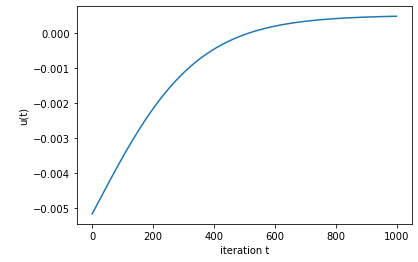

In [372]:
N = 20
O = 0.0055
S = 0.06
D = 0.005
t = np.arange(0, 1000, 1)

def temp(t, N, O, S, D):
    return O*np.tanh(S*(t/N - 0.5)) - D

nu = temp(t,N, O, S, D)
plt.plot(t, nu)
plt.xlabel('iteration t')
plt.ylabel('\nu(t)')
plt.show()

On the graph below, the evolution of spins on one iteration of simCIM is shown. Each color line represent its spin. In ideal case, they should all coincide to $\pm$1 at the end of the algorithm. 

0.013940561149583067


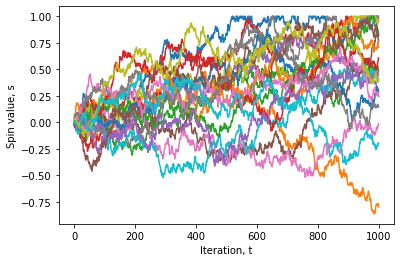

In [379]:
ksi = 0.6
alpha = 0.
sat = 1


def simcim_demo(J, h, nu, ksi, alpha, sat):
    N = len(h)
    x = np.zeros(N)
    mem = []
    delta = np.zeros(N)
    for i in range(int(len(nu)/1)):
        f = np.random.normal(0, 0.02, N)
        delta = nu[i]*x + ksi*(np.dot(J, x) - h)+f+alpha*delta
        x = x + delta
        x = np.where(np.abs(x) < sat, x, sat*np.sign(x))
        mem.append(x)
    #print(x)
    return np.sign(x), np.array(mem)

solution, memory = simcim_demo(J, h, nu, ksi, alpha, sat)
memory = memory.T
print(np.dot(solution, np.dot(J, solution)) - np.dot(h, solution))
plt.figure()
for i in range(N):
    plt.plot(memory[i], label = str(i))
#plt.legend(loc = 'upper left')
plt.xlabel('Iteration, t')
plt.ylabel('Spin value, s')
plt.show()

## QEM-free results

Here, the algorithm is executed 2000 times to calculate the solution and success probability. ALthough the state is calculated correctly, success rate is very low. We attribute it to the fact, that the hyperparameters are not optimal. Nevertheless, this situation is good for testing the performance of QEM methods. 

In [382]:
sol = []
en = []

def simcim(J, h, nu, ksi, alpha, sat):
    N = len(h)
    x = np.zeros(N)
    delta = np.zeros(N)
    for i in range(int(len(nu)/1)):
        f = np.random.normal(0, 0.02, N)
        delta = nu[i]*x + ksi*(np.dot(J, x) - h)+f+alpha*delta
        x = x + delta
        x = np.where(np.abs(x) < sat, x, sat*np.sign(x))
    return np.sign(x)

for ite in range(2000):
    solution = simcim(J, h, nu, ksi, alpha, sat)
    sol.append(solution)
    en.append(np.dot(solution, np.dot(J, solution)) - np.dot(h, solution))

sol = np.array(sol)
en = np.array(en)

print('Minimal energy:',-1*np.max(en))
mm = np.max(en)
print('Solution:', sol[np.argmax(en)])
print('Success rate:', len(np.where(en == mm)[0])/len(en))

Minimal energy: -0.014401282888182553
Solution: [ 1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.]
Success rate: 0.001


## QEM-Inspired 

In this section we will test a possible lgorithm, inspired by bit-flip error cancellation QEM (DOI: 10.1126/sciadv.abi8009). The motivation to use this algorithm lies in the fact, that the errors, occuring in this sort of optimization problem, are of bit-flip type. To mitigate them, we first calculate the hystogram of the results of the solution: $\sum^iterations_{p=1}solution_p$. So, if the histogram value is low, the respecting spin is frequently oscillating from one solution to another. This is actually a good sign, since it means that with some not too high number of iterations, it will eventually create an optimal solution. For those spins, where histogram absolute value is high (>90% of iterations), it means their stability in solutions. This can be both bad and good - some spins may be always estimated correctly, while others are "ill" qubits -- they are always bad. So the QEM-inspired scheme targets these qubits. 

1. Run the algorithm 100 times to obtain a histogram.  
2. Indicate the stable qubits.  
3. Find minimal solution from those 100 iterations.
4. For the stable qubits, perform the brute force search on the lowest energy state. 

The results of this scheme, are presented below. 

In [385]:

sol = []
en = []
hist = np.zeros(N)

for ite in range(500):
    solution = simcim(J, h, nu, ksi, alpha, sat)
    hist =hist + solution
    sol.append(solution)
    en.append(np.dot(solution, np.dot(J, solution)) - np.dot(h, solution))

sol = np.array(sol)
en = np.array(en)
solmin = sol[np.argmax(en)]


print('Histogram:',hist)
hist = np.abs(hist)

ind = np.nonzero(hist>400)
print(ind[0])
n = len(ind[0])


soll = []
enn = []

#exact solution
s = np.array(list(it.product((1,-1), repeat = n)))
for ite in range(len(s)):
    solution = solmin
    p = 0
    for i in ind:
        solution[i] = s[ite][p]
        p+=1
    soll.append(solution)
    enn.append(np.dot(solution, np.dot(J, solution)) - np.dot(h, solution))
    
soll = np.array(soll)
enn = np.array(enn)

print('Minimal energy before the QEM:',np.max(en))
mm = np.max(en)

print('Solution before the QEM:',sol[np.argmax(en)])

print('Minimal energy after the QEM:',np.max(enn))
mmm = np.max(enn)
print('Solution after the QEM:',soll[np.argmax(enn)])

print('Success rate:', (len(np.where(enn == mmm)[0]))/(len(en)))

Histogram: [498. 158. 246. 388. 358. 298. 256. 344. 416. 286. 308. 408. 396. 432.
 396. 334. 364. 298. 142. 186.]
[ 0  8 11 13]
Minimal energy before the QEM: 0.014283405731690126
Solution before the QEM: [-1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
Minimal energy after the QEM: 0.014283405731690126
Solution after the QEM: [-1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1.]
Success rate: 0.016


As it appears, this scheme is not valid enough. It was made with several assumptions, such as a small number of 'ill' qubits. At the end, classical algorithms should be postprocessed classically.